In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

In [3]:
fbs_path = Path('assets','fbs_1961_2013.csv')
fbs = pd.read_csv(fbs_path)

In [4]:
fbs_predict_path = Path('assets','fbs_2014_2050.csv')
fbs_predict = pd.read_csv(fbs_predict_path)
fbs_predict_country_rows = fbs_predict.loc[:,'Country'] == "United States of America"
fbs_predict_country = fbs_predict.loc[fbs_predict_country_rows,:]
fbs_predict_commodity_rows = fbs_predict_country.loc[:,"Item"] == "Fruits - Excluding Wine"
fbs_predict_country_commodity = fbs_predict_country.loc[fbs_predict_commodity_rows,:]
fbs_predict_country_commodity.head()

,Unnamed: 0,Country Code,Country,Item Code,Item,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use
1037,3156,231,United States of America,2919,Fruits - Excluding Wine,NaN,33294.0,8413.0,19669.0,1682.0,27175.0,0.0,NaN,2014,317718.779,NaN
1042,3161,231,United States of America,2919,Fruits - Excluding Wine,NaN,32613.0,8458.0,19633.0,1651.0,27002.0,0.0,NaN,2015,319929.162,NaN
1047,3166,231,United States of America,2919,Fruits - Excluding Wine,NaN,32603.0,8473.0,20026.0,1735.0,26582.0,0.0,NaN,2016,322179.605,NaN
1052,3171,231,United States of America,2919,Fruits - Excluding Wine,NaN,32409.0,8494.0,20049.0,1775.0,26439.0,0.0,NaN,2017,324459.463,NaN
1057,3176,231,United States of America,2919,Fruits - Excluding Wine,NaN,32029.0,8502.0,20145.0,1814.0,26309.0,0.0,NaN,2018,326766.748,NaN


In [5]:
fbs_country_rows = fbs.loc[:,'Country'] == "United States of America"
fbs_country = fbs.loc[fbs_country_rows,:]
fbs_commodity_rows = fbs_country.loc[:,"Item"] == "Fruits - Excluding Wine"
fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
fbs_country_commodity.tail()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use
3100,231,United States of America,2919,Fruits - Excluding Wine,39208.0,33813.0,7400.0,19161.0,1423.0,27448.0,0.0,0.0,2009,309492.0,NaN
3112,231,United States of America,2919,Fruits - Excluding Wine,37538.0,32212.0,7719.0,19256.0,1352.0,26001.0,0.0,0.0,2010,312247.0,NaN
3124,231,United States of America,2919,Fruits - Excluding Wine,36176.0,30768.0,8468.0,17616.0,1371.0,27028.0,0.0,0.0,2011,314912.0,NaN
3136,231,United States of America,2919,Fruits - Excluding Wine,39122.0,32820.0,7817.0,18239.0,2051.0,28744.0,0.0,-45.0,2012,317505.0,NaN
3148,231,United States of America,2919,Fruits - Excluding Wine,40169.0,33454.0,8135.0,19496.0,2148.0,28757.0,0.0,51.0,2013,320051.0,NaN


In [7]:
for index, row in fbs_country_commodity.iterrows():
    if(row["Country"] == "United States of America"):
        imports = row['Import Quantity']/row['Domestic supply quantity'] * 100
        exports = row['Export Quantity']/row['Production'] * 100
        print(row['Year'],"Percentage Imported:",imports)
#         print(row['Year'],"Percentage Exported:",exports)
        fbs_country_commodity.at[index, 'Percentage Exported'] = exports
        fbs_country_commodity.at[index, 'Percentage Imported'] = imports

        
for index, row in fbs_predict_country_commodity.iterrows():
    if(row["Country"] == "United States of America"):
        production = row['Production']
        imports = row['Import Quantity']
        exports = row['Export Quantity']
        population = row['Population']
        losses = row['Losses']
        domestic_supply =  (production + imports - exports)        
        print(row['Year'],"Population:",population,"Percentage Imported:",(imports/domestic_supply)*100)
#         print(row['Year'],"Population:",population,"Percentage Exported:",(exports/production)*100)
        fbs_predict_country_commodity.at[index, 'Percentage Imported'] = (imports/domestic_supply)*100
        fbs_predict_country_commodity.at[index, 'Percentage Exported'] = (exports/production)*100

1961 Percentage Imported: 10.851379412637199
1962 Percentage Imported: 9.179045243224856
1963 Percentage Imported: 11.792337725719863
1964 Percentage Imported: 12.779723392888942
1965 Percentage Imported: 11.56618610747051
1966 Percentage Imported: 11.44654753092947
1967 Percentage Imported: 10.96092281111845
1968 Percentage Imported: 13.572357019064125
1969 Percentage Imported: 11.010050479785347
1970 Percentage Imported: 12.564568586187105
1971 Percentage Imported: 13.929104150214968
1972 Percentage Imported: 15.83133684714902
1973 Percentage Imported: 12.917301280204175
1974 Percentage Imported: 13.145973154362418
1975 Percentage Imported: 12.443600094989314
1976 Percentage Imported: 13.834586466165414
1977 Percentage Imported: 15.473291736417593
1978 Percentage Imported: 18.851169064748202
1979 Percentage Imported: 19.93162518839834
1980 Percentage Imported: 15.410293967367238
1981 Percentage Imported: 24.43757330205779
1982 Percentage Imported: 27.385338807593783
1983 Percentage I

In [8]:
fbs_predict_country_commodity.head()

,Unnamed: 0,Country Code,Country,Item Code,Item,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use,Percentage Imported,Percentage Exported
1037,3156,231,United States of America,2919,Fruits - Excluding Wine,NaN,33294.0,8413.0,19669.0,1682.0,27175.0,0.0,NaN,2014,317718.779,NaN,51.180037,30.958602
1042,3161,231,United States of America,2919,Fruits - Excluding Wine,NaN,32613.0,8458.0,19633.0,1651.0,27002.0,0.0,NaN,2015,319929.162,NaN,51.426251,31.323606
1047,3166,231,United States of America,2919,Fruits - Excluding Wine,NaN,32603.0,8473.0,20026.0,1735.0,26582.0,0.0,NaN,2016,322179.605,NaN,52.513439,31.874953
1052,3171,231,United States of America,2919,Fruits - Excluding Wine,NaN,32409.0,8494.0,20049.0,1775.0,26439.0,0.0,NaN,2017,324459.463,NaN,52.768858,32.126782
1057,3176,231,United States of America,2919,Fruits - Excluding Wine,NaN,32029.0,8502.0,20145.0,1814.0,26309.0,0.0,NaN,2018,326766.748,NaN,53.080207,32.315938


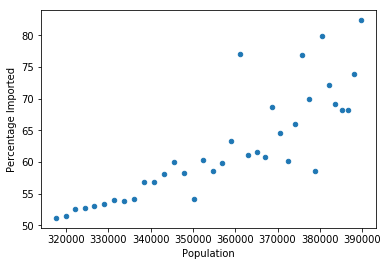

In [9]:
ax = fbs_predict_country_commodity.plot(kind="scatter",x='Population',y='Percentage Imported')
ax;